

# **Aim** -   Identify the important activities of teacher which attempts the doubts the most. 




## **DataFrame** -     Data of Teachers from different School Groups creating no of assignments, conducting tests, polls/quizes in live lectures, Classwork Added.  All these Factors effect the number of doubts attempted by teacher to solve. 





In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [43]:
data=pd.read_csv('C:/Users/Apoorva/OneDrive/Documents/ML_Practice/DataSets-Practice ML/Toppr _analysis/Teacher_Solving_Doubts.csv')

In [44]:
data

,sex,Assignments,Test_Assigned,Polls_Quizes,CW_added,School_Groups,Doubts_attempt
0,female,19,27.900,0,yes,GroupA,16884.92400
1,male,18,33.770,1,no,GroupB,1725.55230
2,male,28,33.000,3,no,GroupB,4449.46200
3,male,33,22.705,0,no,GroupD,21984.47061
4,male,32,28.880,0,no,GroupD,3866.85520
...,...,...,...,...,...,...,...
1333,male,50,30.970,3,no,GroupD,10600.54830
1334,female,18,31.920,0,no,GroupC,2205.98080
1335,female,18,36.850,0,no,GroupB,1629.83350
1336,female,21,25.800,0,no,GroupA,2007.94500


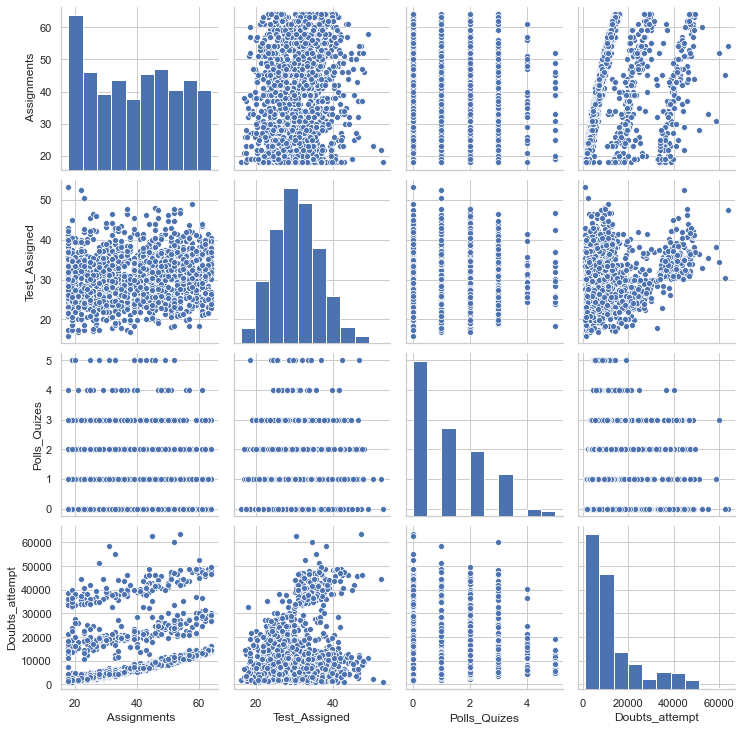

In [45]:
sns.pairplot(data)

**Doubts_attempted are more for all the Test_Assigned.**


**Doubts_attempted linearly related to Assignments. Doubts_attempted are more for large no of assignments.**



In [7]:
data.shape

(1338, 7)

In [8]:
data.describe()

,Assignments,Test_Assigned,Polls_Quizes,Doubts_attempt
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**We'll see how the Doubts are distributed according to given factors**

Text(0.5, 1.0, 'Distribution of Doubts attempted by Teachers')

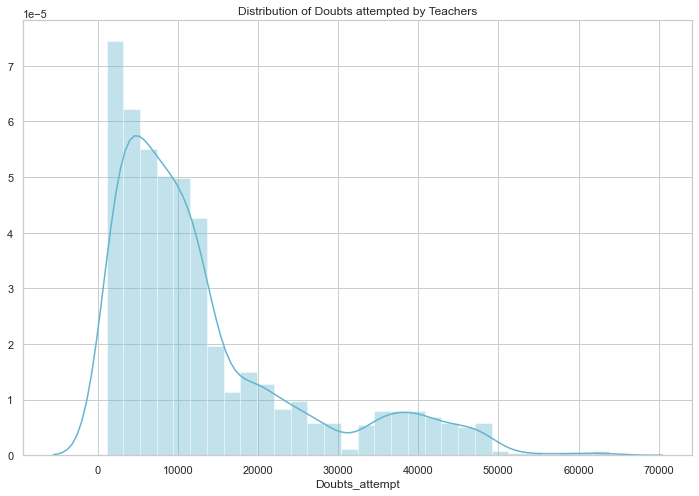

In [9]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(data['Doubts_attempt'], kde = True, color = 'c')
plt.title('Distribution of Doubts attempted by Teachers')

**This distribution is right-skewed. To make it closer to normal we can apply natural log**



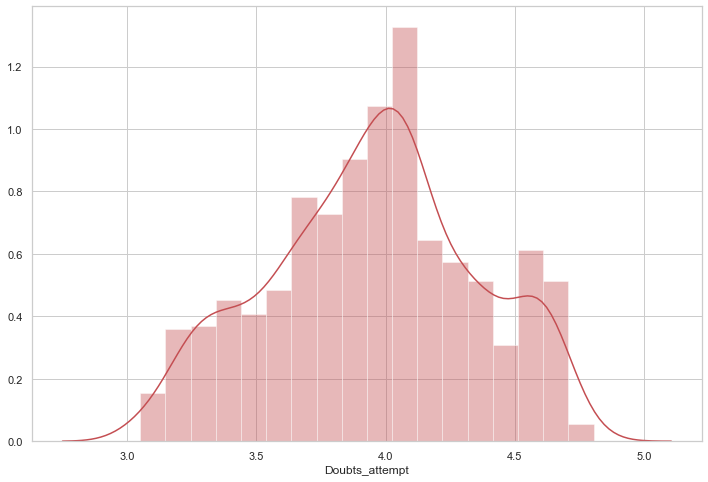

In [10]:
f,ax=plt.subplots(1,1,figsize=(12,8))
ax = sns.distplot(np.log10(data['Doubts_attempt']), kde = True, color = 'r' )


## Looking at Doubts School Group wise

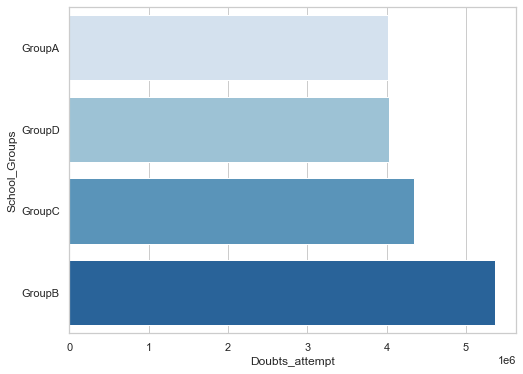

In [13]:
Doubts = data['Doubts_attempt'].groupby(data.School_Groups).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(Doubts.head(), Doubts.head().index, palette='Blues')


**Doubts Attempted are the most in School Group B**

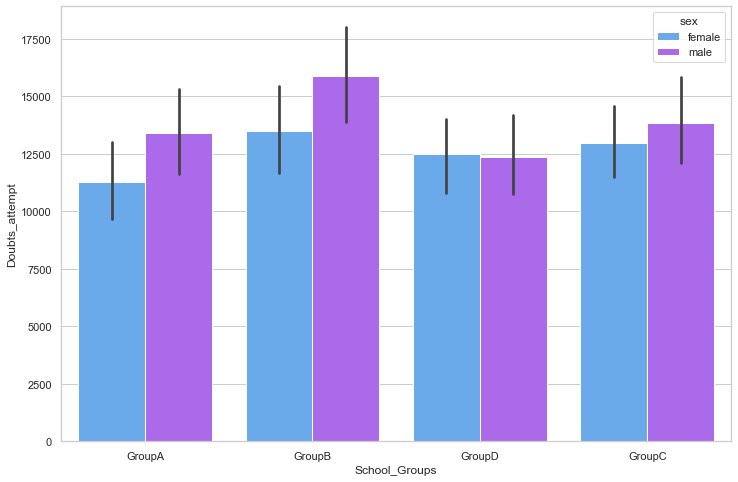

In [14]:
f,ax=plt.subplots(1,1,figsize=(12,8))
ax=sns.barplot(x='School_Groups', y='Doubts_attempt', hue='sex', data=data, palette='cool')

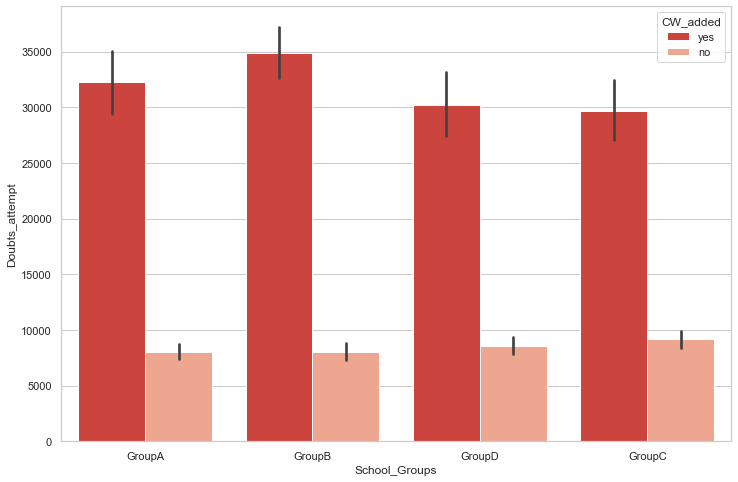

In [15]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'School_Groups', y = 'Doubts_attempt',
                 hue='CW_added', data=data, palette='Reds_r')

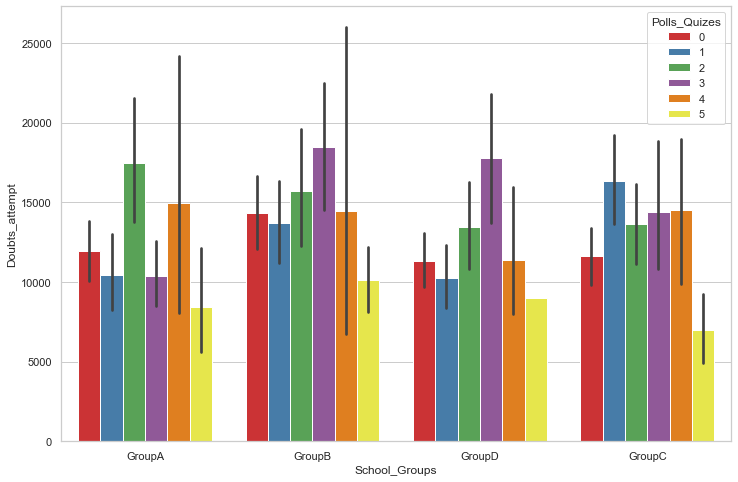

In [21]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x = 'School_Groups', y = 'Doubts_attempt', hue='Polls_Quizes', data=data, palette='Set1')

As we can see from these barplots the highest doubts due to **Classwork Added by teacher in lectures are still in the Group B** but the lowest are in the Group C. 


Teachers of Group A generally add classwork more than teachers of the Group C, 
but people in the Group C have more Doubts attempted by gender than in the Group A and Group D overall. 


And Teacher with quizes and polls tend to attempt higher doubts  overall as well. 

## Now let's analyze the doubts by assignments, test_assigned and polls_quizes according to the Classwork_added factor


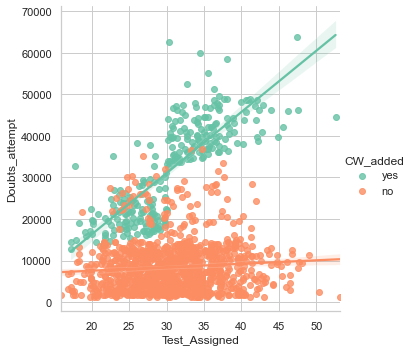

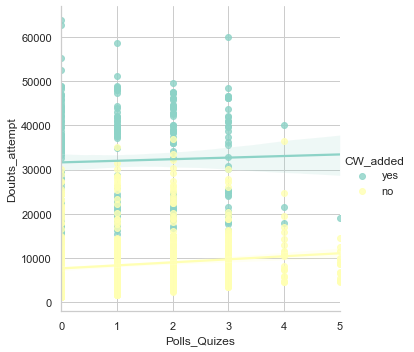

In [36]:
ax = sns.lmplot(x = 'Test_Assigned', y = 'Doubts_attempt', data=data, hue='CW_added', palette='Set2')
ax = sns.lmplot(x = 'Polls_Quizes', y = 'Doubts_attempt', data=data, hue='CW_added', palette='Set3')

**Classwork added has the highest impact on Doubts, even though the Doubts are growing with assignments, tests and polls/quizes.  Also teachers who use polls/quizes generally add less classwork, which the following violinplots shows too**

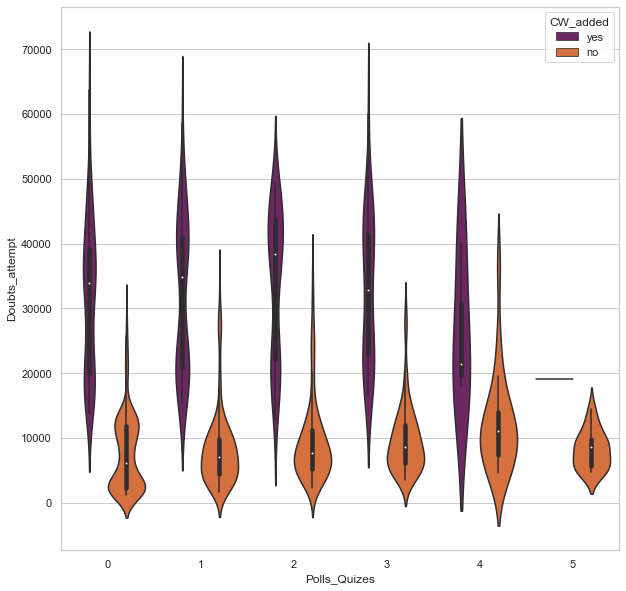

In [51]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'Polls_Quizes', y = 'Doubts_attempt', data=data,
                 orient='v', hue='CW_added', palette='inferno')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             1338 non-null   object 
 1    Assignments    1338 non-null   int64  
 2   Test_Assigned   1338 non-null   float64
 3   Polls_Quizes    1338 non-null   int64  
 4   CW_added        1338 non-null   object 
 5   School_Groups   1338 non-null   object 
 6   Doubts_attempt  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [55]:
##Converting objects labels into categorical
data[['sex', 'CW_added', 'School_Groups']] = data[['sex', 'CW_added', 'School_Groups']].astype('category')
data.dtypes

sex               category
 Assignments         int64
Test_Assigned      float64
Polls_Quizes         int64
CW_added          category
School_Groups     category
Doubts_attempt     float64
dtype: object

In [58]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(data.sex.drop_duplicates())
data.sex = label.transform(data.sex)
label.fit(data.CW_added.drop_duplicates())
data.CW_added = label.transform(data.CW_added)
label.fit(data.School_Groups.drop_duplicates())
data.School_Groups = label.transform(data.School_Groups)
data.dtypes

sex                 int64
 Assignments        int64
Test_Assigned     float64
Polls_Quizes        int64
CW_added            int64
School_Groups       int32
Doubts_attempt    float64
dtype: object

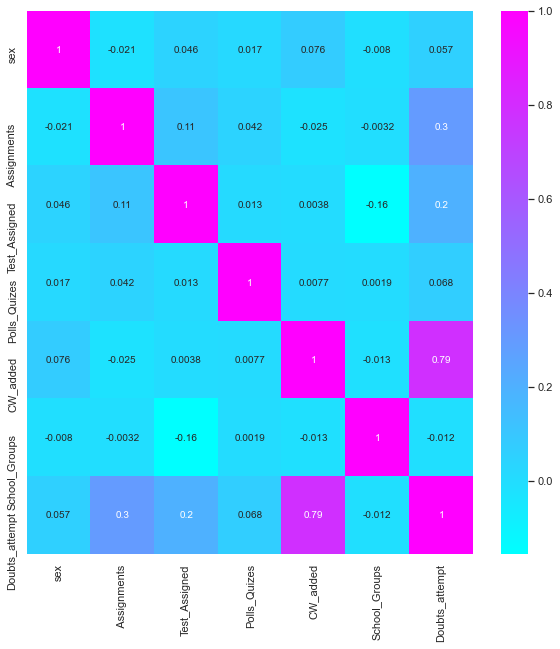

In [59]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(data.corr(), annot=True, cmap='cool')

**No correlation, except with the Cw_added**



# Linear Regression



In [60]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = data.drop(['Doubts_attempt'], axis = 1)
y = data['Doubts_attempt']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-12440.303091718039
[-2.05107355e+01  2.54472588e+02  3.27339554e+02  4.40648868e+02
  2.35811659e+04  2.36351576e+02]
0.7990754766195023


# Ridge Regression


In [61]:
from sklearn.linear_model import Ridge
Ridge=Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-12422.640039237273
[-1.76991261e+01  2.54375742e+02  3.27268301e+02  4.41144602e+02
  2.35132483e+04  2.36553499e+02]
0.7988994958899672


# Lasso Regression 

In [62]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-12439.628594391643
[-1.96441784e+01  2.54471864e+02  3.27326126e+02  4.40507661e+02
  2.35798934e+04  2.36181147e+02]
0.7990700453712613


# Random Forest Regressor



In [63]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = data.drop(['Doubts_attempt'], axis=1)
y = data.Doubts_attempt
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred, y_train),
       metrics.r2_score(y_test,x_test_pred, y_test)))

MSE train data: 3628519.924, MSE test data: 19363134.965
R2 train data: 0.972, R2 test data: 0.878


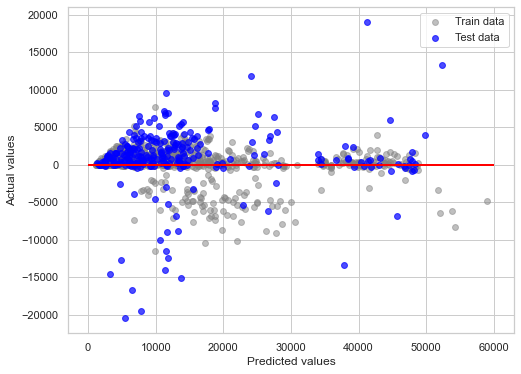

In [64]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

Feature importance ranking


1.CW_added(0.601678)
2.Test_Assigned(0.218745)
3.Assignments(0.136986)
4.Polls_Quizes(0.020649)
5.School_Groups(0.016137)
6.sex(0.005805)


<BarContainer object of 6 artists>

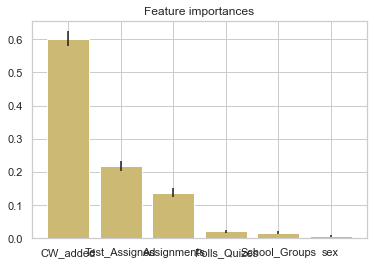

In [67]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['sex', 'Assignments','Test_Assigned', 'Polls_Quizes','CW_added', 'School_Groups']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

Hence Classwork Added by teachers is the most important factor. 


## Conclusion - 
**We will add more Classwork content in the library section of the platform so that teachers can add the already content from the library itself.** 


Hence Teachers solving doubts will **rise** when the content added in live lectures will increase. 